# Clustering

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('../insurance.csv')

a) Clustering

Centroids (original scale):
         age        bmi  children       charges
0  27.383534  28.825402  0.459839   6220.189966
1  50.858333  32.717833  0.545833  21060.608386
2  40.027778  30.466708  2.705556  12636.328784

Cluster sizes:
cluster
0    498
1    480
2    360
Name: count, dtype: int64

Smoker counts per cluster:
smoker    no  yes
cluster          
0        443   55
1        323  157
2        298   62


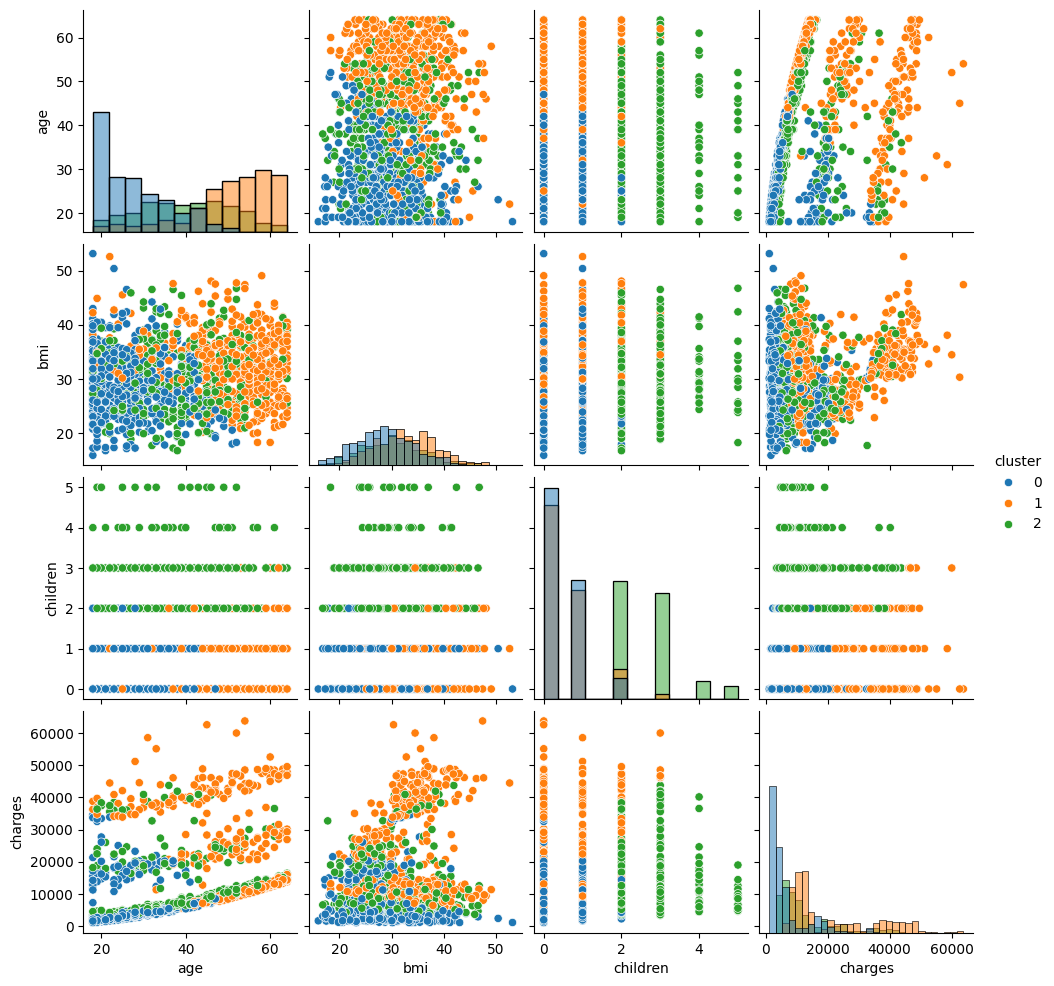

In [10]:
features = ['age', 'bmi', 'children', 'charges']
X = data[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
data['cluster'] = kmeans.labels_

# reverse scale the centroids to get meaningful values
centroids_orig = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids_orig, columns=features)
print('Centroids (original scale):')
print(centroids_df)

cluster_sizes = data['cluster'].value_counts().sort_index()
print('\nCluster sizes:')
print(cluster_sizes)

smoker_counts = data.groupby('cluster')['smoker'].value_counts().unstack(fill_value=0)
print('\nSmoker counts per cluster:')
print(smoker_counts)

plot_df = data[features + ['cluster']].copy()
plot_df['cluster'] = plot_df['cluster'].astype('str') 

g = sns.pairplot(plot_df, hue='cluster', diag_kind='hist', palette='tab10', height=2.5)
plt.show()